In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('income.csv')

In [3]:
raw_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
main_data = raw_data[['workclass','gender','fnlwgt','educational-num','hours-per-week']]

In [5]:
main_data.columns = ['workclass','gender','salary','education','hpw']

In [6]:
main_data.head()

,workclass,gender,salary,education,hpw
0,Private,Male,366425,16,60
1,Private,Male,244602,8,15
2,Private,Male,174201,13,40
3,State-gov,Male,110199,4,40
4,State-gov,Male,149248,10,40


In [7]:
main_data.shape

(43957, 5)

In [8]:
main_data.describe()

,salary,education,hpw
count,4.395700e+04,43957.000000,43957.000000
mean,1.896730e+05,10.074118,40.407694
std,1.058215e+05,2.575092,12.400303
min,1.349200e+04,1.000000,1.000000
25%,1.174960e+05,9.000000,40.000000
50%,1.781000e+05,10.000000,40.000000
75%,2.376710e+05,12.000000,45.000000
max,1.490400e+06,16.000000,99.000000


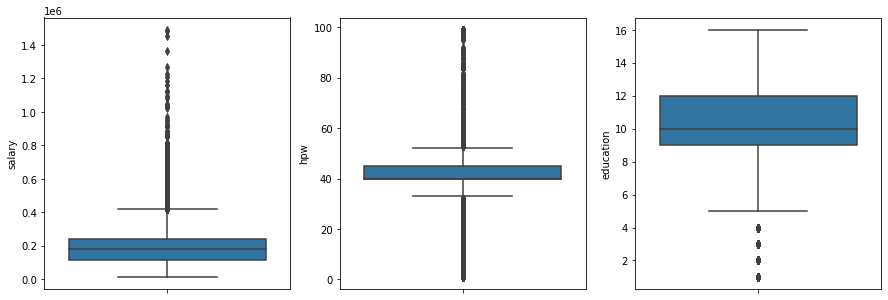

In [9]:
plt.figure(figsize = (15,5)) #size of figure  (length,breadth)
plt.subplot(1,3,1)      # using subplot to make to graphs in one frame
sns.boxplot(y = main_data["salary"])

plt.subplot(1,3,2)  # (1,3,2) means 1 row, 3 columns and the 2nd boxplot
sns.boxplot(y = main_data["hpw"])

plt.subplot(1,3,3)
sns.boxplot(y = main_data["education"])

plt.show()

# The dots shown in boxplot are the outliers

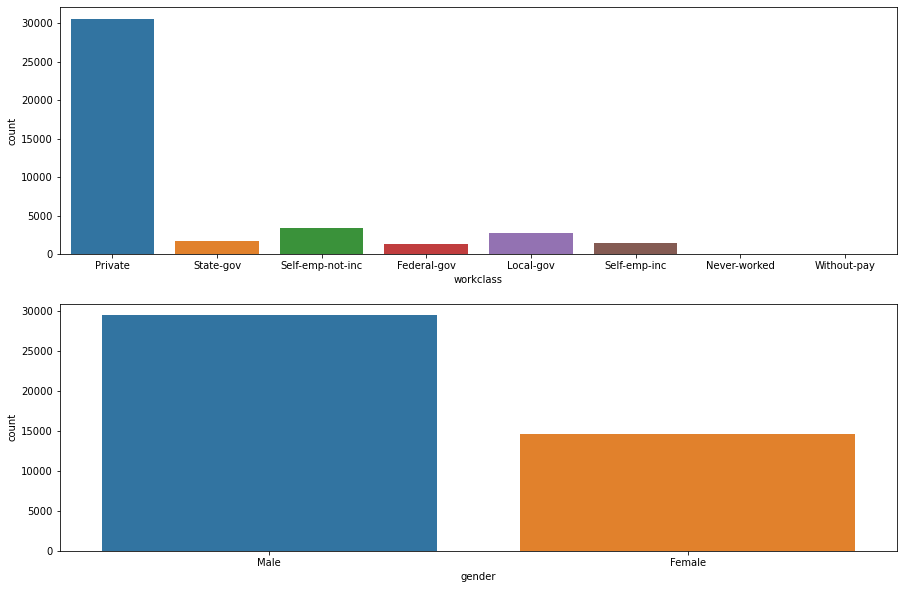

In [10]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.countplot(main_data["workclass"])

plt.subplot(2,1,2)
sns.countplot(main_data["gender"])

plt.show()

In [11]:
main_data["workclass"].value_counts()  # it gives the exact values/frequency of categorical columns

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [12]:
main_data["workclass"].value_counts(normalize = True)

Private             0.737765
Self-emp-not-inc    0.083552
Local-gov           0.068067
State-gov           0.042355
Self-emp-inc        0.036614
Federal-gov         0.030970
Without-pay         0.000482
Never-worked        0.000193
Name: workclass, dtype: float64

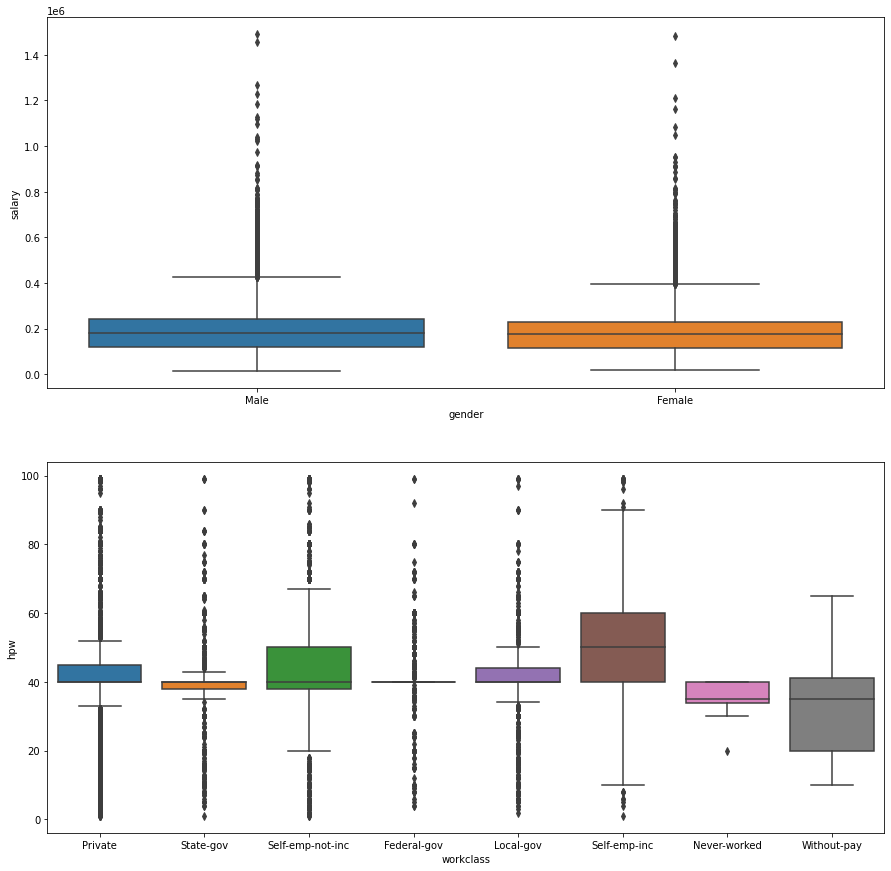

In [13]:
# Above all were univariant analysis, means only one column is taken at a time
# Now we will do bivariant analysis, means will compare two columns 

plt.figure(figsize= (15,15))
plt.subplot(2,1,1)
sns.boxplot(main_data["gender"],main_data["salary"])  

# NOTE: normally we map categorical columns on x axis like workclass in this case
plt.subplot(2,1,2)
sns.boxplot(main_data["workclass"],main_data["hpw"])

plt.show()

In [14]:
pd.crosstab(main_data["workclass"],main_data["gender"])

#it makess a crosstab for categorical columns

gender,Female,Male
workclass,,
Federal-gov,413,871
Local-gov,1139,1683
Never-worked,2,6
Private,10459,20128
Self-emp-inc,182,1336
Self-emp-not-inc,559,2905
State-gov,675,1081
Without-pay,7,13


In [15]:
pd.crosstab(main_data["workclass"],main_data["gender"], normalize = "index").round(2)

# fedral-gov  0.32  0.68,  means 0.32% womens and 0.68% men  work in fedreal-gov

gender,Female,Male
workclass,,
Federal-gov,0.32,0.68
Local-gov,0.40,0.60
Never-worked,0.25,0.75
Private,0.34,0.66
Self-emp-inc,0.12,0.88
Self-emp-not-inc,0.16,0.84
State-gov,0.38,0.62
Without-pay,0.35,0.65


<AxesSubplot:>

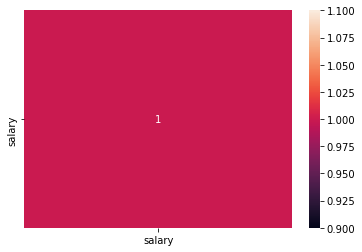

In [16]:
sns.heatmap(main_data[["workclass","salary"]].corr(), annot = True)  # finding correlation btw them

In [17]:
main_data.isnull().sum()

workclass    2498
gender          0
salary          0
education       0
hpw             0
dtype: int64

In [18]:
main_data.head()

,workclass,gender,salary,education,hpw
0,Private,Male,366425,16,60
1,Private,Male,244602,8,15
2,Private,Male,174201,13,40
3,State-gov,Male,110199,4,40
4,State-gov,Male,149248,10,40


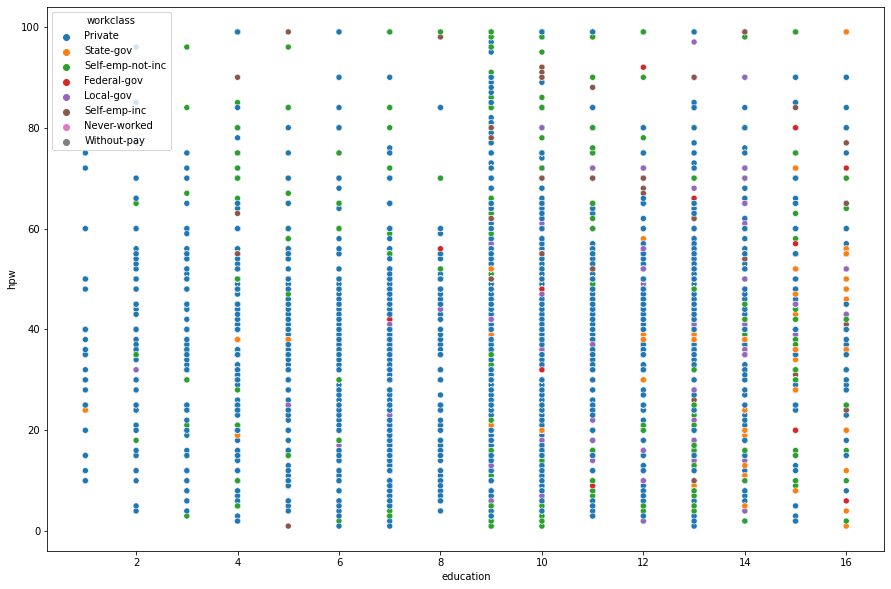

In [19]:
plt.figure(figsize = (15,10))
sns.scatterplot(x="education",y="hpw", data = main_data, hue = "workclass")
plt.show()

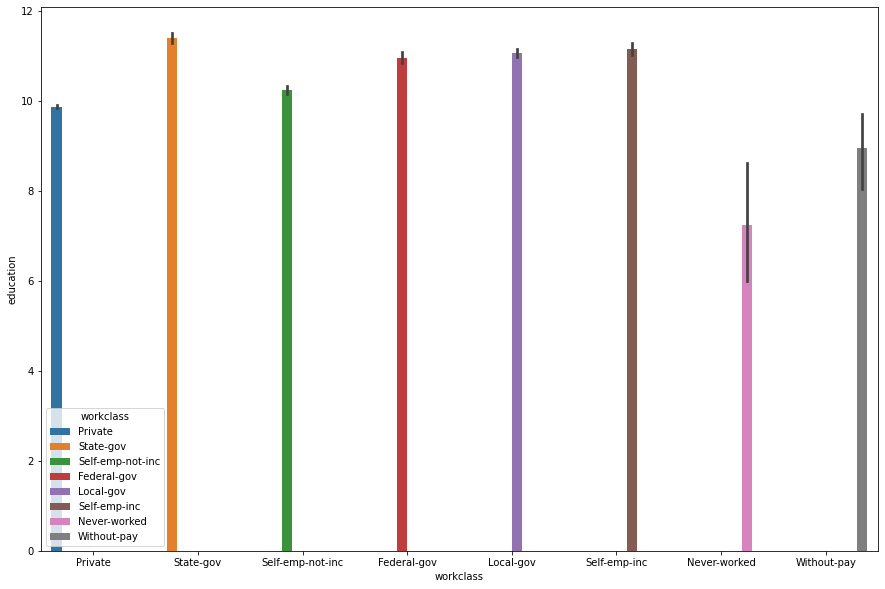

In [20]:
plt.figure(figsize = (15,10))
sns.barplot(x="workclass", y = "education", data = main_data, hue = "workclass")
plt.show()

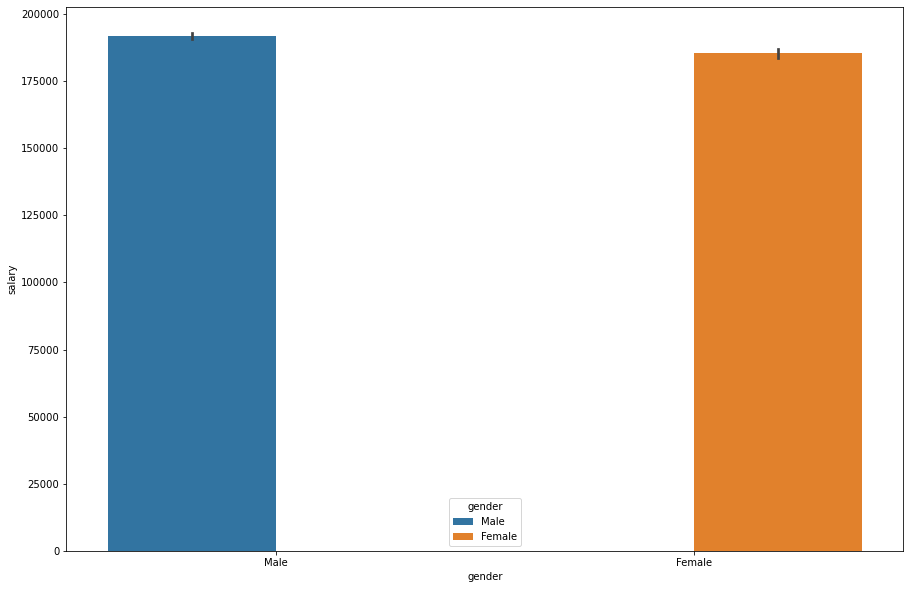

In [21]:
plt.figure(figsize = (15,10))
sns.barplot(x="gender", y = "salary", data = main_data, hue = "gender")
plt.show()

In [22]:
main_data.head()

,workclass,gender,salary,education,hpw
0,Private,Male,366425,16,60
1,Private,Male,244602,8,15
2,Private,Male,174201,13,40
3,State-gov,Male,110199,4,40
4,State-gov,Male,149248,10,40


In [23]:
main_data.isnull().sum()

workclass    2498
gender          0
salary          0
education       0
hpw             0
dtype: int64

In [24]:
Q1, Q3 = main_data['salary'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [25]:
UL

417933.5

In [26]:
df = main_data[main_data['salary']>UL]

In [27]:
df

,workclass,gender,salary,education,hpw
39,Private,Female,434463,13,39
63,State-gov,Female,534775,10,50
88,NaN,Male,432376,10,40
113,Private,Male,437727,14,45
152,Private,Male,436253,10,35
...,...,...,...,...,...
43838,Private,Male,425627,10,40
43854,Self-emp-not-inc,Male,456956,9,60
43857,Private,Male,510072,9,40
43928,Private,Female,461715,9,25


In [28]:
df['gender'].count()

1324

In [29]:
df['gender'].value_counts(normalize = True)

Male      0.726586
Female    0.273414
Name: gender, dtype: float64

In [30]:
df['gender'].value_counts()

Male      962
Female    362
Name: gender, dtype: int64

In [31]:
main_data['salary'] = np.where(main_data['salary']>UL, UL, main_data['salary']) #removing outliers

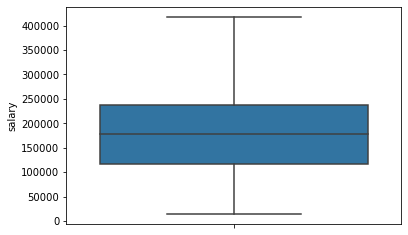

In [32]:
sns.boxplot(y = main_data['salary'])
plt.show()

In [33]:
main_data.head()

,workclass,gender,salary,education,hpw
0,Private,Male,366425.0,16,60
1,Private,Male,244602.0,8,15
2,Private,Male,174201.0,13,40
3,State-gov,Male,110199.0,4,40
4,State-gov,Male,149248.0,10,40


In [34]:
main_data

,workclass,gender,salary,education,hpw
0,Private,Male,366425.0,16,60
1,Private,Male,244602.0,8,15
2,Private,Male,174201.0,13,40
3,State-gov,Male,110199.0,4,40
4,State-gov,Male,149248.0,10,40
...,...,...,...,...,...
43952,Private,Male,68982.0,13,50
43953,Private,Female,116562.0,9,40
43954,Private,Male,197947.0,10,58
43955,Private,Female,97883.0,13,35


In [35]:
# main_data = main_data[["salary", "education", "hpw", "workclass_Private","gender_Male"]]

In [36]:
main_data.head()

,workclass,gender,salary,education,hpw
0,Private,Male,366425.0,16,60
1,Private,Male,244602.0,8,15
2,Private,Male,174201.0,13,40
3,State-gov,Male,110199.0,4,40
4,State-gov,Male,149248.0,10,40


In [39]:
main_data = pd.get_dummies(main_data, drop_first = True)

In [40]:
main_data.head()

,salary,education,hpw,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,gender_Male
0,366425.0,16,60,0,0,1,0,0,0,0,1
1,244602.0,8,15,0,0,1,0,0,0,0,1
2,174201.0,13,40,0,0,1,0,0,0,0,1
3,110199.0,4,40,0,0,0,0,0,1,0,1
4,149248.0,10,40,0,0,0,0,0,1,0,1


In [41]:
main_data = main_data[["salary","education","hpw","workclass_Private","gender_Male"]]
main_data.columns = ["salary","education","hpw","private_work","gender"]

In [42]:
main_data.head()

,salary,education,hpw,private_work,gender
0,366425.0,16,60,1,1
1,244602.0,8,15,1,1
2,174201.0,13,40,1,1
3,110199.0,4,40,0,1
4,149248.0,10,40,0,1


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x = main_data.drop('private_work', axis = 1) #all columns are independent except private_work
y = main_data['private_work'] # private_work = dependent variables

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 21, stratify = y)

In [46]:
print(x_train.shape)
print(x_test.shape)

(30769, 4)
(13188, 4)


In [47]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))
#1 = private workclass
#0 = not private workclass

1    0.7
0    0.3
Name: private_work, dtype: float64
 
1    0.7
0    0.3
Name: private_work, dtype: float64


In [48]:
from imblearn.over_sampling import SMOTE
#synthetic minority over sampling technique is used when we have less samples, so we can use over samples (dummy samples)
sm = SMOTE(random_state = 33, sampling_strategy = 0.75) #sampling strategy = 0.75 = 3/4, means for every 4 data in the category 
# present in majority, it will add 3 data in the category present in minority
x_res, y_res = sm.fit_sample(x_train, y_train) #x_res = resampled

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred = lr.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
confusion_matrix(y_test,y_pred) #(actual values, predicted values)

array([[   0, 4011],
       [   0, 9177]], dtype=int64)

In [55]:
(0+9177)/(0+9177+0+4011) # = accuracy

0.695859872611465